Check,

1. If the current is the same across the core sizes.

2. The effect of core size on current decomposition.

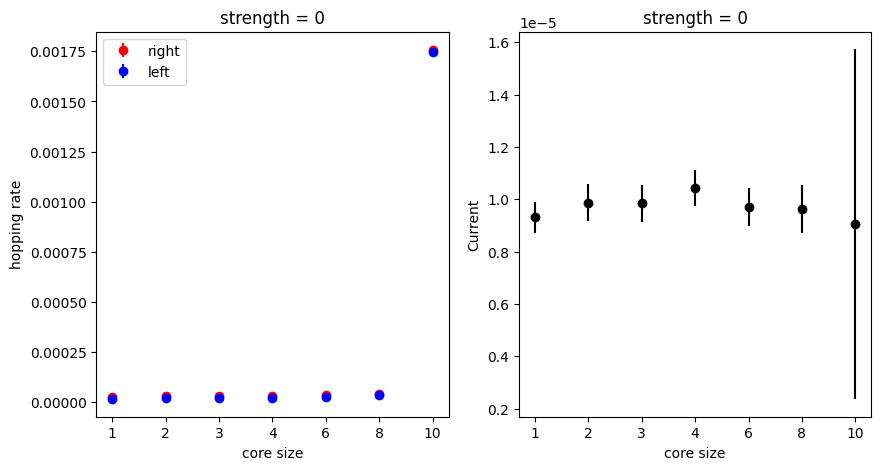

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/ggu7596/project/optimal_control/motorsim_double_track/toy_model_v2/post_analysis")
from analysis_classes.dynamics_analysis import nonequilibrium_analysis

path1 = "/home/ggu7596/project/optimal_control/motorsim_double_track/toy_model_v2/middle_check/core_size_current_decomposition_shallow_well_high_fuel/strength_0"
dirs = ["core_size_1", "core_size_2", "core_size_3", "core_size_4","core_size_6","core_size_8","core_size_10"]
noneq = nonequilibrium_analysis()
fig, ax = plt.subplots(1,2,figsize=(10,5))
for i, dir in enumerate(dirs):
    sub_path = path1 + "/" + dir
    r_r_mean, r_r_err, r_l_mean, r_l_err = noneq.hopping_rates(sub_path)
    ax[0].errorbar(i,r_r_mean,yerr=r_r_err,label="right",color='red',fmt='o')
    ax[0].errorbar(i,r_l_mean,yerr=r_l_err,label="left",color='blue',fmt='o')
    ax[1].errorbar(i,r_r_mean-r_l_mean,yerr=r_r_err+r_l_err,color='black',fmt='o')
    if i == 0:
        ax[0].legend()
ax[0].set_xticks(np.arange(len(dirs)),[dir.split("_")[-1] for dir in dirs])
#ax[0].set_ylim(0,2e-5)
ax[0].set_xlabel("core size")
ax[0].set_ylabel("hopping rate")
ax[0].set_title("strength = 0")
ax[1].set_xticks(np.arange(len(dirs)),[dir.split("_")[-1] for dir in dirs])
#ax[1].set_ylim(0,7e-6)
ax[1].set_xlabel("core size")
ax[1].set_ylabel("Current")
ax[1].set_title("strength = 0")
plt.show()

Text(0.5, 1.0, 'strength = 0.1')

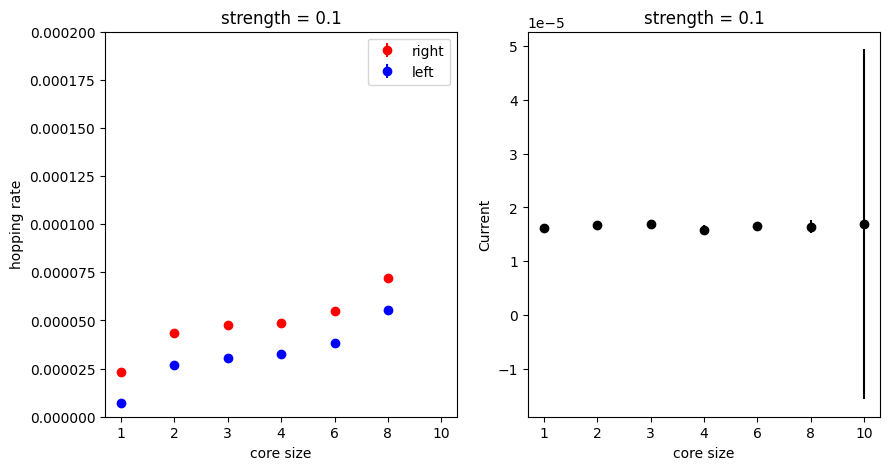

In [2]:
path2 = "/home/ggu7596/project/optimal_control/motorsim_double_track/toy_model_v2/middle_check/core_size_current_decomposition_shallow_well_high_fuel/strength_0.1"
fig, ax = plt.subplots(1,2,figsize=(10,5))
for i, dir in enumerate(dirs):
    sub_path = path2 + "/" + dir
    r_r_mean, r_r_err, r_l_mean, r_l_err = noneq.hopping_rates(sub_path)
    ax[0].errorbar(i,r_r_mean,yerr=r_r_err,label="right",color='red',fmt='o')
    ax[0].errorbar(i,r_l_mean,yerr=r_l_err,label="left",color='blue',fmt='o')
    ax[1].errorbar(i,r_r_mean-r_l_mean,yerr=r_r_err+r_l_err,color='black',fmt='o')
    if i == 0:
        ax[0].legend()
ax[0].set_xticks(np.arange(len(dirs)),[dir.split("_")[-1] for dir in dirs])
ax[0].set_ylim(0,20e-5)
ax[0].set_xlabel("core size")
ax[0].set_ylabel("hopping rate")
ax[0].set_title("strength = 0.1")
ax[1].set_xticks(np.arange(len(dirs)),[dir.split("_")[-1] for dir in dirs])
#ax[1].set_ylim(0,8e-6)
ax[1].set_xlabel("core size")
ax[1].set_ylabel("Current")
ax[1].set_title("strength = 0.1")

In [3]:
# if the ratio of activity and bias is changed as the core size changed.

Text(0, 0.5, 'bias')

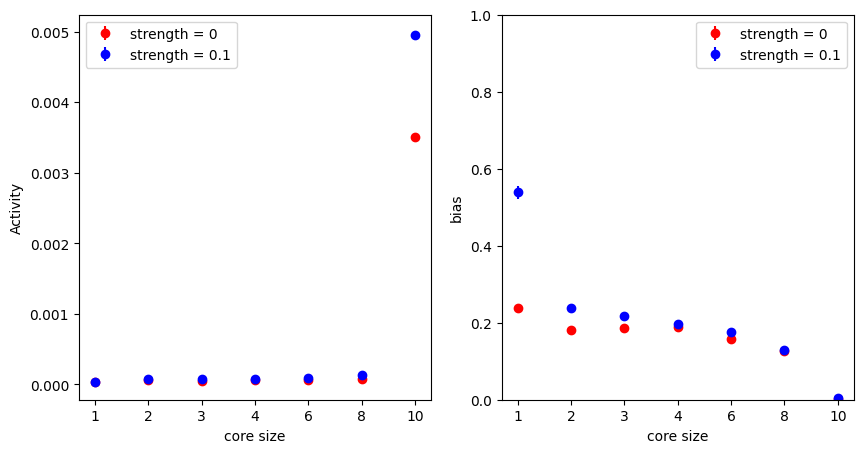

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/ggu7596/project/optimal_control/motorsim_double_track/toy_model_v2/post_analysis")
from analysis_classes.dynamics_analysis import nonequilibrium_analysis

def activity(r_r_mean, r_r_err, r_l_mean, r_l_err):
    return (r_r_mean+r_l_mean),(r_r_err+r_l_err)
def bias(r_r_mean, r_r_err, r_l_mean, r_l_err):
    bias = (r_r_mean-r_l_mean)/(r_r_mean+r_l_mean)
    bias_err = bias*np.sqrt((r_r_err/r_r_mean)**2+(r_l_err/r_l_mean)**2)
    return bias, bias_err
fig, ax = plt.subplots(1,2,figsize=(10,5))
for i, dir in enumerate(dirs):
    sub_path1 = path1 + "/" + dir
    r_r_mean_1, r_r_err_1, r_l_mean_1, r_l_err_1 = noneq.hopping_rates(sub_path1)
    sub_path2 = path2 + "/" + dir
    r_r_mean_2, r_r_err_2, r_l_mean_2, r_l_err_2 = noneq.hopping_rates(sub_path2)

    # calculate activity and bias
    activity_1, activity_err_1 = activity(r_r_mean_1, r_r_err_1, r_l_mean_1, r_l_err_1)
    activity_2, activity_err_2 = activity(r_r_mean_2, r_r_err_2, r_l_mean_2, r_l_err_2)
    bias_1, bias_err_1 = bias(r_r_mean_1, r_r_err_1, r_l_mean_1, r_l_err_1)
    bias_2, bias_err_2 = bias(r_r_mean_2, r_r_err_2, r_l_mean_2, r_l_err_2)

    # plot activity and bias
    ax[0].errorbar(i,activity_1,yerr=activity_err_1,label="strength = 0",color='red',fmt='o')
    ax[0].errorbar(i,activity_2,yerr=activity_err_2,label="strength = 0.1",color='blue',fmt='o')
    ax[1].errorbar(i,bias_1,yerr=bias_err_1,label="strength = 0",color='red',fmt='o')
    ax[1].errorbar(i,bias_2,yerr=bias_err_2,label="strength = 0.1",color='blue',fmt='o')
    if i == 0:
        ax[0].legend()
        ax[1].legend()
ax[0].set_xticks(np.arange(len(dirs)),[dir.split("_")[-1] for dir in dirs])
#ax[0].set_ylim(0,15e-5)
ax[0].set_xlabel("core size")
ax[0].set_ylabel("Activity")
ax[1].set_xticks(np.arange(len(dirs)),[dir.split("_")[-1] for dir in dirs])
ax[1].set_ylim(0,1)
ax[1].set_xlabel("core size")
ax[1].set_ylabel("bias")

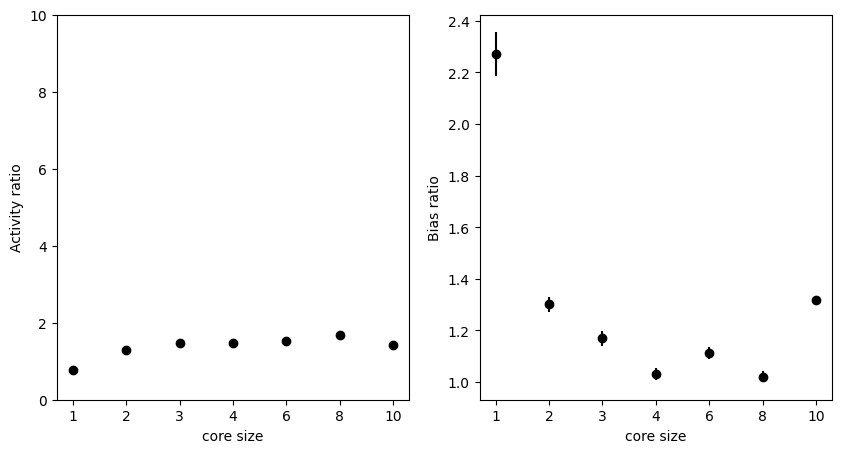

In [5]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
for i, dir in enumerate(dirs):
    sub_path1 = path1 + "/" + dir
    r_r_mean_1, r_r_err_1, r_l_mean_1, r_l_err_1 = noneq.hopping_rates(sub_path1)
    sub_path2 = path2 + "/" + dir
    r_r_mean_2, r_r_err_2, r_l_mean_2, r_l_err_2 = noneq.hopping_rates(sub_path2)

    # calculate activity and bias
    activity_1, activity_err_1 = activity(r_r_mean_1, r_r_err_1, r_l_mean_1, r_l_err_1)
    activity_2, activity_err_2 = activity(r_r_mean_2, r_r_err_2, r_l_mean_2, r_l_err_2)
    bias_1, bias_err_1 = bias(r_r_mean_1, r_r_err_1, r_l_mean_1, r_l_err_1)
    bias_2, bias_err_2 = bias(r_r_mean_2, r_r_err_2, r_l_mean_2, r_l_err_2)

    # plot activity and bias ratio
    ax[0].errorbar(i,activity_2/activity_1,yerr=activity_2/activity_1*np.sqrt((activity_err_2/activity_2)**2+(activity_err_1/activity_1)**2),color='black',fmt='o')
    ax[1].errorbar(i,bias_2/bias_1,yerr=bias_2/bias_1*np.sqrt((bias_err_2/bias_2)**2+(bias_err_1/bias_1)**2),color='black',fmt='o')
ax[0].set_xticks(np.arange(len(dirs)),[dir.split("_")[-1] for dir in dirs])
ax[0].set_xlabel("core size")
ax[0].set_ylabel("Activity ratio")
ax[1].set_xticks(np.arange(len(dirs)),[dir.split("_")[-1] for dir in dirs])
ax[1].set_xlabel("core size")
ax[1].set_ylabel("Bias ratio")
ax[0].set_ylim(0,10)
#ax[1].set_ylim(0,1)
plt.show()


In [6]:
# Current hasn't converged yet (8/13/2025).
# The current decomposition has been stable since core size 3.
# The ratio of activity and bias are not that affected by the core size when the well is deep enough.
# Need to check if the core size is affected by the well depth.